<a href="https://colab.research.google.com/github/royanurag005/Image_classification_Segmentation_model_Rust_No_Rust/blob/main/model_segmentation_Rust_Part_II_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9sercc_9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9sercc_9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=9ed6dbe535f597e73c42b3a28849d708675ea7ca332f810dfc4a496700b76178
  Stored in directory: /tmp/pip-ephem-wheel-cache-uz3nh_uo/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import os
from segment_anything import sam_model_registry

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

# Path to the mounted Google Drive directory
drive_path = "/content/drive/MyDrive"

# Path within your Google Drive where the checkpoint is located
checkpoint_relative_path = "/content/sam_vit_h_4b8939.pth"

# Combine the drive path and the checkpoint relative path to get the full path
CHECKPOINT_PATH = os.path.join(drive_path, checkpoint_relative_path)

# Load the model
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
import cv2
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)
IMAGE_PATH='/content/drive/MyDrive/Segmentation_image/84223874-painted-iron-blue-surface-with-a-large-rusty-spot-and-metal-corrosion-background-texture.jpg'
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

In [ ]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)

In [ ]:
import cv2
import numpy as np
from segment_anything import SamPredictor

mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
mask_predictor.set_image(image_rgb)

box = np.array([70, 247, 626, 926])
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

In [ ]:
!pip install matplotlib

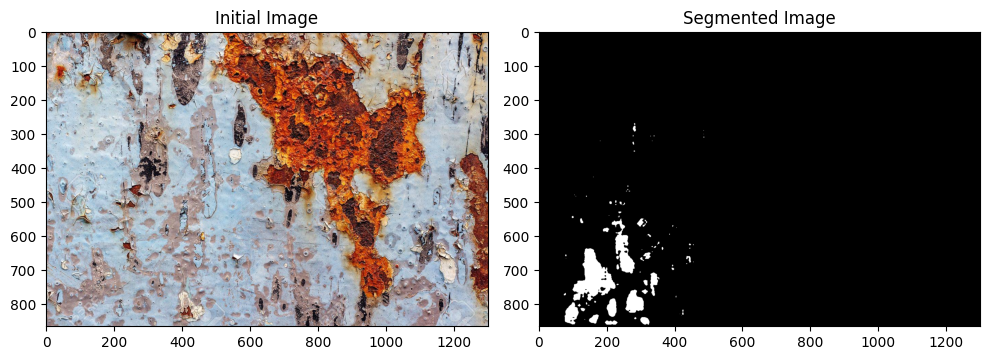

In [ ]:
import matplotlib.pyplot as plt
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

# Plot the initial image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Initial Image")

# Plot the segmented image
plt.subplot(1, 2, 2)
segmented_image = masks[0].astype(np.uint8) * 255  # Assuming masks[0] is the segmented mask
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ho2zzvec
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ho2zzvec
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


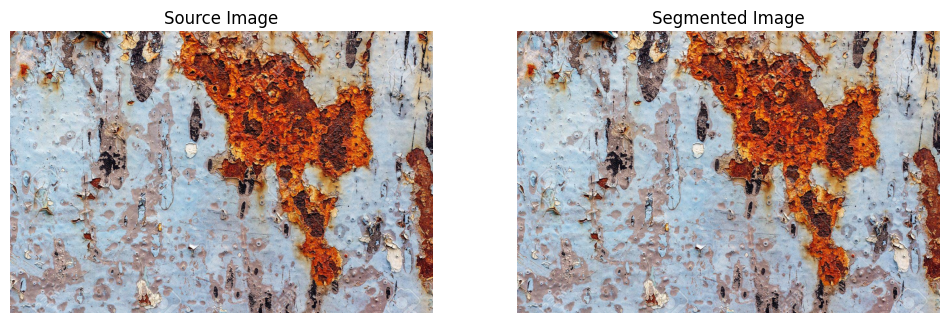

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

# Import necessary libraries
import os
import numpy as np
import cv2
import supervision as sv
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from jupyter_bbox_widget import BBoxWidget

# Set paths and variables
HOME = '/content'
CHECKPOINT_PATH = os.path.join(HOME, "weights", "/content/drive/MyDrive/Segmentation_image/sam_vit_h_4b8939.pth")
IMAGE_NAME = "/content/drive/MyDrive/Segmentation_image/84223874-painted-iron-blue-surface-with-a-large-rusty-spot-and-metal-corrosion-background-texture.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

# Load the model
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)
mask_predictor = SamPredictor(sam)

# Load and preprocess the image
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Generate masks using mask generator
sam_result = mask_generator.generate(image_rgb)
masks = [mask['segmentation'] for mask in sorted(sam_result, key=lambda x: x['area'], reverse=True)]
#initial image, segmented image, and masks
sv.plot_images_grid(
    images=[image_bgr, image_bgr.copy()],
    grid_size=(1, 2),
    titles=['Source Image', 'Segmented Image']
)



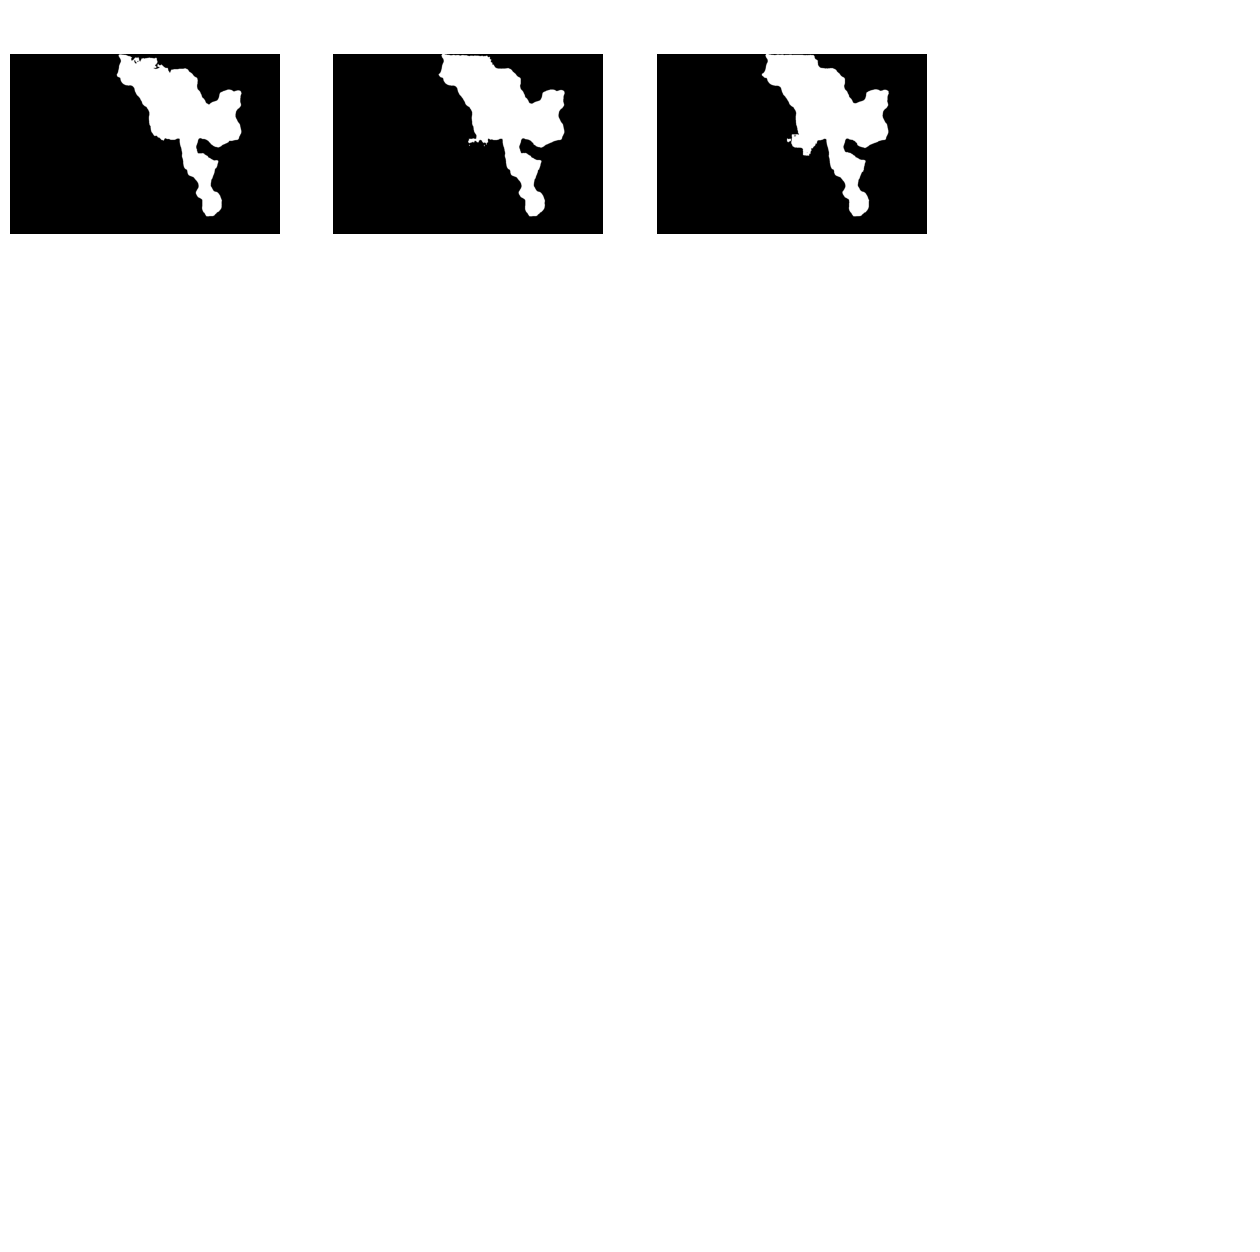

In [ ]:
# Define the box annotator and mask annotator
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

# Annotate and display the source and segmented images
source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)


num_masks = len(masks)
grid_size = (4, 4)  # Adjust the grid size to your preference

for i in range(0, num_masks, grid_size[0] * grid_size[1]):
    subset_masks = masks[i:i + grid_size[0] * grid_size[1]]
    sv.plot_images_grid(
        images=subset_masks,
        grid_size=grid_size,
        size=(16, 16),
        cmap='gray'
    )


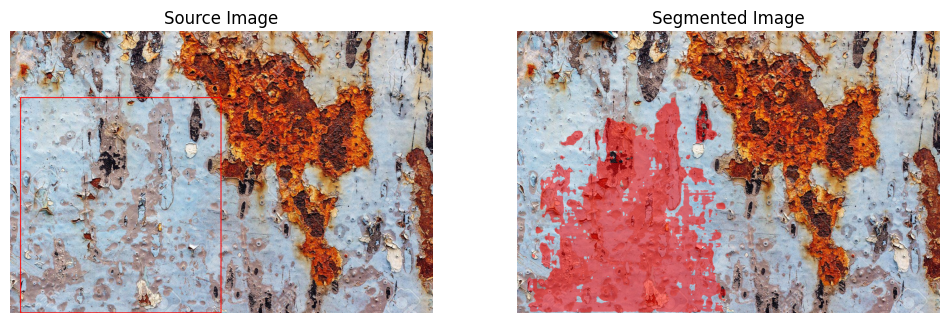

In [ ]:
# Create and display BBoxWidget for interactive box selection
widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

# Get the selected box or use a default box
box = widget.bboxes[0] if widget.bboxes else default_box
box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])

# Set the image for mask prediction
mask_predictor.set_image(image_rgb)

# Predict masks using the selected box
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

# Annotate and display the source and segmented images
detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['Source Image', 'Segmented Image']
)


In [ ]:
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64," + encoded


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

# Define the encode_image function
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64," + encoded

# Create and display BBoxWidget for interactive box selection
widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

# Rest of the code...


BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

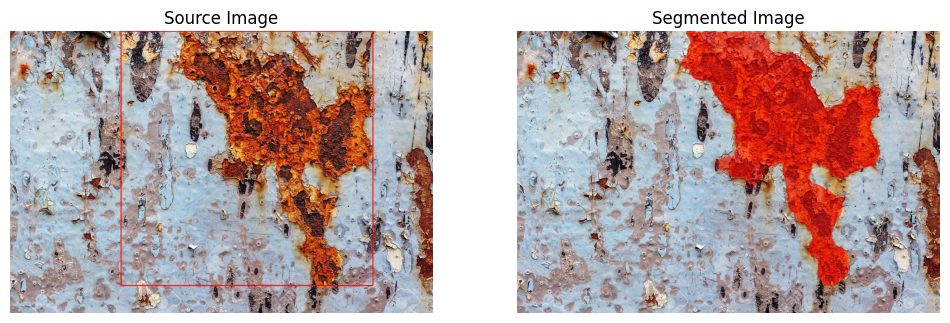

In [ ]:
# Define the default_box
default_box = {'x': 68, 'y': 247, 'width': 555, 'height': 678, 'label': ''}



# Get the selected box or use a default box


box = widget.bboxes[0] if widget.bboxes else default_box
box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])

# Set the image for mask prediction
mask_predictor.set_image(image_rgb)

# Predict masks using the selected box
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

# Annotate and display the source and segmented images
detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['Source Image', 'Segmented Image']
)
